Importação dos módulos

In [2]:
import pandas as pd
import numpy as np
import os
import re
import seaborn as sns
from matplotlib import pyplot as plt



**Adição dos arquivos csv**

In [3]:
circuitos=pd.read_csv("https://raw.githubusercontent.com/JosenildoVicente/analiseDadosF1/master/f1/circuits.csv", encoding = "ISO-8859-1")
equipes_resultados=pd.read_csv("https://raw.githubusercontent.com/JosenildoVicente/analiseDadosF1/master/f1/constructorResults.csv", encoding = "ISO-8859-1")
equipes_classificacao=pd.read_csv("https://raw.githubusercontent.com/JosenildoVicente/analiseDadosF1/master/f1/constructorStandings.csv", encoding = "ISO-8859-1")
equipes=pd.read_csv("https://raw.githubusercontent.com/JosenildoVicente/analiseDadosF1/master/f1/constructors.csv", encoding = "ISO-8859-1")
pilotos_classificacao=pd.read_csv("https://raw.githubusercontent.com/JosenildoVicente/analiseDadosF1/master/f1/driverStandings.csv", encoding = "ISO-8859-1")
pilotos=pd.read_csv("https://raw.githubusercontent.com/JosenildoVicente/analiseDadosF1/master/f1/drivers.csv", encoding = "ISO-8859-1")
tempos_voltas=pd.read_csv("https://raw.githubusercontent.com/JosenildoVicente/analiseDadosF1/master/f1/lapTimes.csv", encoding = "ISO-8859-1")
tempos_parada=pd.read_csv("https://raw.githubusercontent.com/JosenildoVicente/analiseDadosF1/master/f1/pitStops.csv", encoding = "ISO-8859-1")
qualificacao=pd.read_csv("https://raw.githubusercontent.com/JosenildoVicente/analiseDadosF1/master/f1/qualifying.csv", encoding = "ISO-8859-1")
corridas=pd.read_csv("https://raw.githubusercontent.com/JosenildoVicente/analiseDadosF1/master/f1/races.csv", encoding = "ISO-8859-1")
resultados=pd.read_csv("https://raw.githubusercontent.com/JosenildoVicente/analiseDadosF1/master/f1/results.csv", encoding = "ISO-8859-1")
temporadas=pd.read_csv("https://raw.githubusercontent.com/JosenildoVicente/analiseDadosF1/master/f1/seasons.csv", encoding = "ISO-8859-1")
status=pd.read_csv("https://raw.githubusercontent.com/JosenildoVicente/analiseDadosF1/master/f1/status.csv", encoding = "ISO-8859-1")

**Pré processamento dos dados:**

## **Verificando as tabelas**

In [4]:
circuitos.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,NaN,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,NaN,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,MontmelÌ_,Spain,41.57000,2.26111,NaN,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,NaN,http://en.wikipedia.org/wiki/Istanbul_Park


In [5]:
equipes_resultados.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,NaN
1,2,18,2,8.0,NaN
2,3,18,3,9.0,NaN
3,4,18,4,5.0,NaN
4,5,18,5,2.0,NaN


In [6]:
equipes_classificacao.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,Unnamed: 7
0,1,18,1,14.0,1,1,1,NaN
1,2,18,2,8.0,3,3,0,NaN
2,3,18,3,9.0,2,2,0,NaN
3,4,18,4,5.0,4,4,0,NaN
4,5,18,5,2.0,5,5,0,NaN


In [7]:
equipes.head()

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,NaN


In [8]:
pilotos_classificacao.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [9]:
pilotos.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [10]:
tempos_voltas.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [11]:
tempos_parada.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [12]:
qualificacao.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [13]:
corridas.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [14]:
resultados.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [15]:
temporadas.head()

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


In [16]:
#apenas para verificar algumas consultas
races_by_year = pd.merge(corridas,temporadas, on='year', how = 'inner')
races_by_year[races_by_year['year'] == 2010]

,raceId,year,round,circuitId,name,date,time,url_x,url_y
336,337,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,http://en.wikipedia.org/wiki/2010_Formula_One_...
337,338,2010,2,1,Australian Grand Prix,2010-03-28,06:00:00,http://en.wikipedia.org/wiki/2010_Australian_G...,http://en.wikipedia.org/wiki/2010_Formula_One_...
338,339,2010,3,2,Malaysian Grand Prix,2010-04-04,08:00:00,http://en.wikipedia.org/wiki/2010_Malaysian_Gr...,http://en.wikipedia.org/wiki/2010_Formula_One_...
339,340,2010,4,17,Chinese Grand Prix,2010-04-18,06:00:00,http://en.wikipedia.org/wiki/2010_Chinese_Gran...,http://en.wikipedia.org/wiki/2010_Formula_One_...
340,341,2010,5,4,Spanish Grand Prix,2010-05-09,12:00:00,http://en.wikipedia.org/wiki/2010_Spanish_Gran...,http://en.wikipedia.org/wiki/2010_Formula_One_...
341,342,2010,6,6,Monaco Grand Prix,2010-05-16,12:00:00,http://en.wikipedia.org/wiki/2010_Monaco_Grand...,http://en.wikipedia.org/wiki/2010_Formula_One_...
342,343,2010,7,5,Turkish Grand Prix,2010-05-30,11:00:00,http://en.wikipedia.org/wiki/2010_Turkish_Gran...,http://en.wikipedia.org/wiki/2010_Formula_One_...
343,344,2010,8,7,Canadian Grand Prix,2010-06-13,16:00:00,http://en.wikipedia.org/wiki/2010_Canadian_Gra...,http://en.wikipedia.org/wiki/2010_Formula_One_...
344,345,2010,9,12,European Grand Prix,2010-06-27,12:00:00,http://en.wikipedia.org/wiki/2010_European_Gra...,http://en.wikipedia.org/wiki/2010_Formula_One_...
345,346,2010,10,9,British Grand Prix,2010-07-11,12:00:00,http://en.wikipedia.org/wiki/2010_British_Gran...,http://en.wikipedia.org/wiki/2010_Formula_One_...


In [17]:
resultados['positionText'].value_counts()

R     8517
F     1368
3      986
4      986
2      984
5      982
1      979
6      975
7      955
8      927
9      889
10     829
11     752
12     651
13     565
14     461
15     391
W      323
16     310
17     226
N      190
18     149
D      141
19     101
20      58
21      34
22      19
E        9
23       8
24       3
32       1
26       1
27       1
29       1
28       1
25       1
33       1
31       1
30       1
Name: positionText, dtype: int64

In [18]:
resultados.shape

(23777, 18)

In [19]:
circuitos.shape

(73, 9)

In [20]:
pilotos.shape

(842, 9)

In [21]:
equipes.shape

(208, 6)

In [22]:
corridas.shape

(997, 8)

In [23]:
resultados.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number             float64
grid                 int64
position           float64
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds       float64
fastestLap         float64
rank               float64
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

In [24]:
equipes.dtypes

constructorId       int64
constructorRef     object
name               object
nationality        object
url                object
Unnamed: 5        float64
dtype: object

In [25]:
circuitos.dtypes

circuitId       int64
circuitRef     object
name           object
location       object
country        object
lat           float64
lng           float64
alt           float64
url            object
dtype: object

In [26]:
pilotos.dtypes

driverId         int64
driverRef       object
number         float64
code            object
forename        object
surname         object
dob             object
nationality     object
url             object
dtype: object

In [27]:
corridas.dtypes

raceId        int64
year          int64
round         int64
circuitId     int64
name         object
date         object
time         object
url          object
dtype: object

In [28]:
resultados.isna().sum()

resultId               0
raceId                 0
driverId               0
constructorId          0
number                 6
grid                   0
position           10550
positionText           0
positionOrder          0
points                 0
laps                   0
time               17773
milliseconds       17774
fastestLap         18394
rank               18246
fastestLapTime     18394
fastestLapSpeed    18394
statusId               0
dtype: int64

In [29]:
circuitos.isnull().sum()

circuitId      0
circuitRef     0
name           0
location       0
country        0
lat            0
lng            0
alt           72
url            0
dtype: int64

## **Agora vamos ao pré-processamento de fato**

Vimos todas as tabelas dos nossos dados e seus atributos, vamos unir em um único dataframe para que possa facilitar nossa vida na hora das análises.

Primeiro vamos remover dados que julgamos que não são necessários ou que não farão parte na nossa análise, bem como renomear alguns para maior entendimento do escopo.

In [30]:
resultados.drop(columns = ['rank', 'positionOrder'], inplace = True)

equipes.drop(columns = ['nationality', 'url', 'Unnamed: 5'], inplace = True)
equipes.rename(columns = {'name': 'constructorName'}, inplace = True)

corridas.drop(columns = ['time', 'url'], inplace = True)
corridas.rename(columns = {'name': 'raceName', 'date': 'raceDate'}, inplace = True)

circuitos.drop(columns = ['lat', 'lng', 'alt', 'url'], inplace = True)
circuitos.rename(columns = {'name': 'circuitName'}, inplace = True)

pilotos.drop(columns = ['number', 'code', 'url'], inplace = True)

unindo todos os os dataframes utilizados em um úni dataframe

In [31]:
df = resultados.copy()
df = df.merge(equipes, how = 'left')
df = df.merge(corridas, how = 'left')
df = df.merge(circuitos, how = 'left')
df = df.merge(pilotos, how = 'left')
df = df.merge(status, how = 'left')

In [32]:
len(df), len(resultados)

(23777, 23777)

como podemos perceber acima, os merges foram corretos e não geraram duplicatas.

**Agora que cobrimos boa parte do pré-processamento, vamos começar a extrair as informações**

In [33]:
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,points,laps,time,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,statusId,constructorRef,constructorName,year,round,circuitId,raceName,raceDate,circuitRef,circuitName,location,country,driverRef,forename,surname,dob,nationality,status
0,1,18,1,1,22.0,1,1.0,1,10.0,58,34:50.6,5690616.0,39.0,01:27.5,218.3,1,mclaren,McLaren,2008,1,1,Australian Grand Prix,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,hamilton,Lewis,Hamilton,07/01/1985,British,Finished
1,2,18,2,2,3.0,5,2.0,2,8.0,58,5.478,5696094.0,41.0,01:27.7,217.586,1,bmw_sauber,BMW Sauber,2008,1,1,Australian Grand Prix,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,heidfeld,Nick,Heidfeld,10/05/1977,German,Finished
2,3,18,3,3,7.0,7,3.0,3,6.0,58,8.163,5698779.0,41.0,01:28.1,216.719,1,williams,Williams,2008,1,1,Australian Grand Prix,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,rosberg,Nico,Rosberg,27/06/1985,German,Finished
3,4,18,4,4,5.0,11,4.0,4,5.0,58,17.181,5707797.0,58.0,01:28.6,215.464,1,renault,Renault,2008,1,1,Australian Grand Prix,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,alonso,Fernando,Alonso,29/07/1981,Spanish,Finished
4,5,18,5,1,23.0,3,5.0,5,4.0,58,18.014,5708630.0,43.0,01:27.4,218.385,1,mclaren,McLaren,2008,1,1,Australian Grand Prix,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,kovalainen,Heikki,Kovalainen,19/10/1981,Finnish,Finished


Primeiro vamos ver qual o período de tempo abordado nesse conjunto de dados.

In [34]:
df['year'].min(), df['year'].max()

(1950, 2017)

In [35]:
df.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number             float64
grid                 int64
position           float64
positionText        object
points             float64
laps                 int64
time                object
milliseconds       float64
fastestLap         float64
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
constructorRef      object
constructorName     object
year                 int64
round                int64
circuitId            int64
raceName            object
raceDate            object
circuitRef          object
circuitName         object
location            object
country             object
driverRef           object
forename            object
surname             object
dob                 object
nationality         object
status              object
dtype: object

Podemos perceber que alguns tipos não estão no formato que deveriam, como o atributo fastestLapSpeed, portanto vamos converte-lo e seguir com as análises

In [36]:
df['fastestLapSpeed'].astype('float64')

ValueError: ignored

É possível perceber que um erro foi gerado na conversão, para não gerar impactos em análises posteriores vamos verificar o motivo disso estar acontecendo

In [37]:
df[df['fastestLapSpeed'] == '01:42.6'][['driverRef','year','country','fastestLapSpeed','fastestLapTime']]

,driverRef,year,country,fastestLapSpeed,fastestLapTime
23764,ocon,2017,UAE,01:42.6,01:42.6


Para corrigir o problema, vamos utilizar a técnica de relacionar a velocidade dele com a média de velocidade

Obs: Como o atributo fastestLapSpeed ainda não foi convertido calculamos manualmente e atribuiremos esse valor.

In [38]:
df[(df['year'] == 2017) & (df['country'] == 'UAE')][['driverRef', 'fastestLapTime','fastestLapSpeed','position']]

,driverRef,fastestLapTime,fastestLapSpeed,position
23757,bottas,01:40.7,198.652,1.0
23758,hamilton,01:41.5,197.041,2.0
23759,vettel,01:40.8,198.416,3.0
23760,raikkonen,01:42.3,195.376,4.0
23761,max_verstappen,01:42.0,195.969,5.0
23762,hulkenberg,01:42.4,195.303,6.0
23763,perez,01:42.7,194.708,7.0
23764,ocon,01:42.6,01:42.6,8.0
23765,alonso,01:43.4,193.41,9.0
23766,massa,01:43.0,194.071,10.0


In [39]:
df.loc[23764,['fastestLapSpeed']] = '194.551'

Verificando a atualização

In [40]:
df[(df['year'] == 2017) & (df['country'] == 'UAE')][['driverRef', 'fastestLapTime','fastestLapSpeed','position']]

,driverRef,fastestLapTime,fastestLapSpeed,position
23757,bottas,01:40.7,198.652,1.0
23758,hamilton,01:41.5,197.041,2.0
23759,vettel,01:40.8,198.416,3.0
23760,raikkonen,01:42.3,195.376,4.0
23761,max_verstappen,01:42.0,195.969,5.0
23762,hulkenberg,01:42.4,195.303,6.0
23763,perez,01:42.7,194.708,7.0
23764,ocon,01:42.6,194.551,8.0
23765,alonso,01:43.4,193.41,9.0
23766,massa,01:43.0,194.071,10.0


Agora vamos a conversão

In [41]:
df['fastestLapSpeed'] = df['fastestLapSpeed'].astype('float64')
getMeanSpeed = df[(df['year'] == 2017) & (df['country'] == 'UAE')]
getMeanSpeed['fastestLapSpeed'].mean()

194.5642

vamos adicionar mais um coluna no dataframe relativa a distância da volta, para calcular a distância sabemos que velocidade = distância/tempo, portanto distância = velocidade * tempo, dessa forma saberemos qual a distância de 1 volta da corrida

In [42]:
df['fastestLapTimeSeg'] = (df['fastestLapTime'].str.split(':', expand = True)[0].astype('float64') * 60) + df['fastestLapTime'].str.split(':', expand = True)[1].astype('float64')
df['fastestLapTimeSeg'].head()


0    87.5
1    87.7
2    88.1
3    88.6
4    87.4
Name: fastestLapTimeSeg, dtype: float64

In [43]:
df['fastestLapSpeedMps'] = 1000 * df['fastestLapSpeed'] / 3600

uma vez que possuimos a tabela em Metros por segundo, podemos calcular a distância aproximada do circuito conforme a formula s = v * t

In [44]:
df['lapDist'] = df['fastestLapTimeSeg'] * df['fastestLapSpeedMps']
df['lapDist'].head()

0    5305.902778
1    5300.636722
2    5303.595528
3    5302.808444
4    5301.902500
Name: lapDist, dtype: float64

In [45]:
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,points,laps,time,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,statusId,constructorRef,constructorName,year,round,circuitId,raceName,raceDate,circuitRef,circuitName,location,country,driverRef,forename,surname,dob,nationality,status,fastestLapTimeSeg,fastestLapSpeedMps,lapDist
0,1,18,1,1,22.0,1,1.0,1,10.0,58,34:50.6,5690616.0,39.0,01:27.5,218.300,1,mclaren,McLaren,2008,1,1,Australian Grand Prix,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,hamilton,Lewis,Hamilton,07/01/1985,British,Finished,87.5,60.638889,5305.902778
1,2,18,2,2,3.0,5,2.0,2,8.0,58,5.478,5696094.0,41.0,01:27.7,217.586,1,bmw_sauber,BMW Sauber,2008,1,1,Australian Grand Prix,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,heidfeld,Nick,Heidfeld,10/05/1977,German,Finished,87.7,60.440556,5300.636722
2,3,18,3,3,7.0,7,3.0,3,6.0,58,8.163,5698779.0,41.0,01:28.1,216.719,1,williams,Williams,2008,1,1,Australian Grand Prix,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,rosberg,Nico,Rosberg,27/06/1985,German,Finished,88.1,60.199722,5303.595528
3,4,18,4,4,5.0,11,4.0,4,5.0,58,17.181,5707797.0,58.0,01:28.6,215.464,1,renault,Renault,2008,1,1,Australian Grand Prix,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,alonso,Fernando,Alonso,29/07/1981,Spanish,Finished,88.6,59.851111,5302.808444
4,5,18,5,1,23.0,3,5.0,5,4.0,58,18.014,5708630.0,43.0,01:27.4,218.385,1,mclaren,McLaren,2008,1,1,Australian Grand Prix,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,kovalainen,Heikki,Kovalainen,19/10/1981,Finnish,Finished,87.4,60.662500,5301.902500


Após analisarmos melhor os dados percebemos que a velocidade das voltas estavam sendo medidas em MPH e a distância da pista medida em metros, portanto vamos realizar as respectivas conversões

In [46]:
df['fastestLapSpeed'] = df['fastestLapSpeed']*1.61
df['lapDist'] = df['lapDist'] / 1000
df[['country','circuitName', 'lapDist','fastestLapSpeed']].head()

,country,circuitName,lapDist,fastestLapSpeed
0,Australia,Albert Park Grand Prix Circuit,5.305903,351.46300
1,Australia,Albert Park Grand Prix Circuit,5.300637,350.31346
2,Australia,Albert Park Grand Prix Circuit,5.303596,348.91759
3,Australia,Albert Park Grand Prix Circuit,5.302808,346.89704
4,Australia,Albert Park Grand Prix Circuit,5.301902,351.59985


In [64]:
#df.plot.scatter(x='country', y='lapDist')
df_lapDist = df.groupby(['country'],as_index=False).agg({'lapDist':'mean'}).sort_values('lapDist',ascending=False).copy()
df_lapDist = df_lapDist.iloc[0:25]
df_lapDist

,country,lapDist
5,Belgium,7.000153
3,Azerbaijan,6.002895
22,Russia,5.848062
13,Italy,5.644613
14,Japan,5.629909
15,Korea,5.614988
30,UK,5.580127
29,UAE,5.553881
16,Malaysia,5.543269
4,Bahrain,5.487970


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


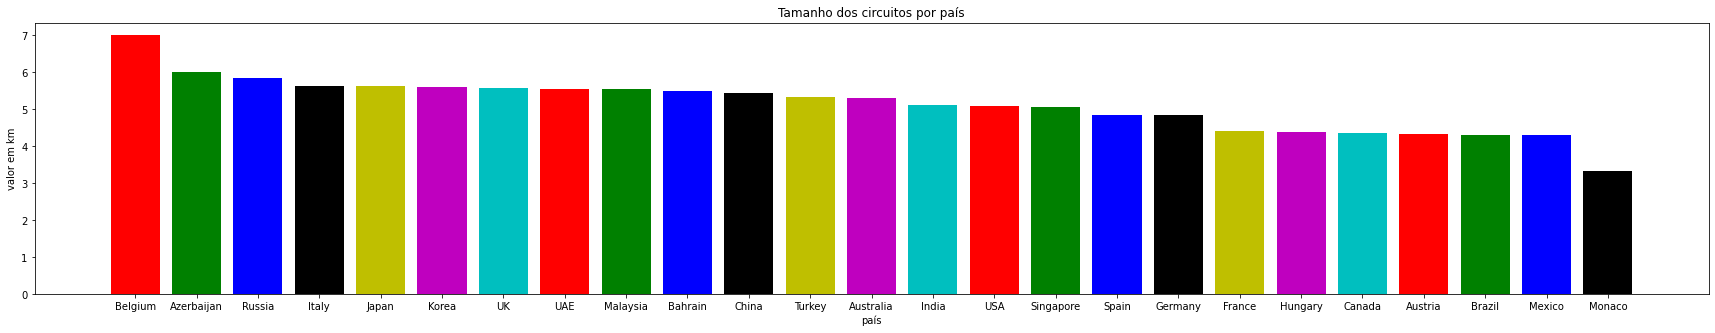

In [66]:
my_colors = 'rgbkymc'
fig, ax = plt.subplots(figsize = (30, 5))
ax.bar(df_lapDist['country'],  df_lapDist['lapDist'], color = my_colors)
ax.set(xlabel = 'país'
       , ylabel = 'valor em km'
       , title = 'Tamanho dos circuitos por país')

plt.show()

# **Agora que lidamos com alguns parâmetros e fizemos correções, mãos à obra!!**

Como que está o desempenho dos carros ao longo do tempo?



antes de tudo, vamos verificar se está tudo ok com a informação de velocidade.

In [49]:
dados_vel = df.copy()

len(dados_vel[dados_vel['fastestLapSpeed'].isna()]) / len(dados_vel)

0.7736047440804138

como podemos perceber, cerca de 77% da informação de velocidade está em branco, ou seja, precisamos tratar esses casos.

para isso vamos olhar quais anos possuem essa quantidade de dados faltantes

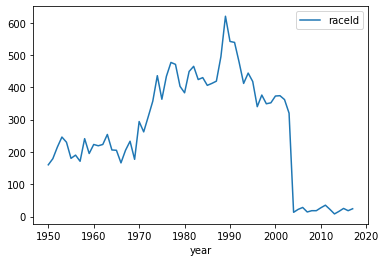

In [50]:
dados_vel[dados_vel['fastestLapSpeed'].isna()].groupby(['year']).agg({'raceId': 'count'}).plot()

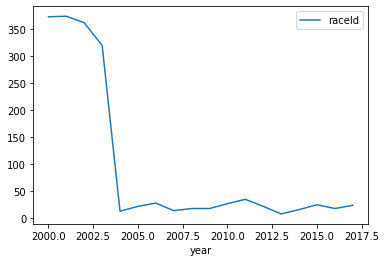

In [51]:
dados_vel[dados_vel['fastestLapSpeed'].isna()].groupby(['year']).agg({'raceId': 'count'}).loc[2000:].plot()

podemos verificar que a partir até mais ou menos 2004 existe uma grande quantidade de informação nula sobre a velocidade dos pilotos, portanto vamos apenas trabalhar com os dados de 2004 até os anos mais recentes.

In [52]:
velOrg = dados_vel.copy()

dados_vel = dados_vel[dados_vel['year'] >= 2004]
dados_vel.isna().sum()

resultId                 0
raceId                   0
driverId                 0
constructorId            0
number                   0
grid                     0
position              1191
positionText             0
points                   0
laps                     0
time                  3049
milliseconds          3049
fastestLap             288
fastestLapTime         288
fastestLapSpeed        288
statusId                 0
constructorRef           0
constructorName          0
year                     0
round                    0
circuitId                0
raceName                 0
raceDate                 0
circuitRef               0
circuitName              0
location                 0
country                  0
driverRef                0
forename                 0
surname                  0
dob                      0
nationality              0
status                   0
fastestLapTimeSeg      288
fastestLapSpeedMps     288
lapDist                288
dtype: int64

podemos perceber que ainda existem dados nulos, vamos compará-los ao dataset original para verificar quão foi o impacto da remoção das velocidades nulas anteriores a 2004.

In [53]:
dados_vel['fastestLapSpeed'].isna().sum()/len(dados_vel)

0.05078469405748545

por conhecer o domínio, sabemos que existem pilotos que não foram capazes de terminar a corrida por qualquer motivo que seja. Suspeitamos que essa é a razão de boa parte dos dados faltantes, portanto vamos filtrar os status dos pilotos para analisar somente as velocidades daqueles que conseguiram terminar a corrida

In [54]:
finalistas = dados_vel[(dados_vel['status'].str.startswith('+')) | (dados_vel['status'] == 'Finished')]['status'].drop_duplicates()
finalistas = list(finalistas)
finalistas

['Finished',
 '+1 Lap',
 '+2 Laps',
 '+4 Laps',
 '+3 Laps',
 '+11 Laps',
 '+5 Laps',
 '+17 Laps',
 '+12 Laps',
 '+7 Laps',
 '+26 Laps',
 '+6 Laps',
 '+8 Laps',
 '+10 Laps',
 '+9 Laps',
 '+42 Laps',
 '+14 Laps']

In [55]:
len(dados_vel[(dados_vel['status'].isin(finalistas))]) / len(dados_vel)

0.7725268912008464

In [56]:
dados_vel = dados_vel[(dados_vel['status'].isin(finalistas))]
dados_vel.isna().sum()

resultId                 0
raceId                   0
driverId                 0
constructorId            0
number                   0
grid                     0
position                16
positionText             0
points                   0
laps                     0
time                  1763
milliseconds          1763
fastestLap              24
fastestLapTime          24
fastestLapSpeed         24
statusId                 0
constructorRef           0
constructorName          0
year                     0
round                    0
circuitId                0
raceName                 0
raceDate                 0
circuitRef               0
circuitName              0
location                 0
country                  0
driverRef                0
forename                 0
surname                  0
dob                      0
nationality              0
status                   0
fastestLapTimeSeg       24
fastestLapSpeedMps      24
lapDist                 24
dtype: int64

como visto acima nós fomos capazes de eliminar uma grande parte dos registros problemáticos.

vamos verificar qual o comportamento da velocidade media no GP do Brasil ao longo do tempo

In [57]:
dados_vel = dados_vel.groupby(['year', 'country'], as_index = False).agg({'fastestLapSpeed': np.median, 'lapDist': np.mean})

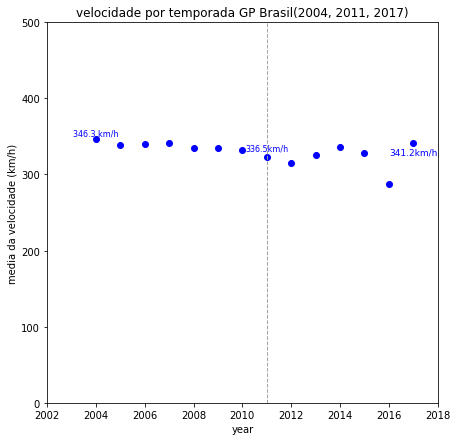

In [58]:
fig, ax = plt.subplots(figsize = (7,7))
df_temp = dados_vel[dados_vel['country'] == 'Brazil']

ax.scatter(df_temp['year'], df_temp['fastestLapSpeed'], color = '#0000FF')
ax.set(xlabel = 'year'
            , ylabel = 'media da velocidade (km/h)'
            , title = 'velocidade por temporada GP Brasil(2004, 2011, 2017)'
            , ylim = (0, 500)
            , xlim = (2002, 2018))
    # adição de uma linha vertical em 2011
ax.axvline(x = 2011, color = '#a3a3a3', linewidth = 1, linestyle = 'dashed')
    # adicionando labels para os 3 anos em destaque
plt.text(x = 2004
             , y = df_temp.iloc[0, 2] + 5
             , s = '{} km/h'.format(round(df_temp.iloc[0, 2], 1))
             , size = 8
             , color = '#0000FF'
             , ha = 'center')
plt.text(x = 2011
             , y = df_temp.iloc[10, 2] - 5
             , s = '{}km/h'.format(round(df_temp.iloc[10, 2], 1))
             , size = 8
             , color = '#0000FF'
             , ha = 'center')
plt.text(x = 2017
             , y = df_temp.iloc[13, 2] - 15
             , s = '{}km/h'.format(round(df_temp.iloc[13, 2], 1))
             , size = 9
             , color = '#0000FF'
             , ha = 'center')
plt.show()

Agora queremos saber quais são as nações que possuem a maior quantidade de pontos ganhos e, consequentemente, as mais vencedoras da história da F1.

Para isso vamos somar os pontos ganhos por nacionalidade e a porcentagem relativa para determinar esse critério desejado.

In [59]:
df_nationality = df.groupby(['nationality'],as_index=False).agg({'points' : 'sum'}).sort_values('points',ascending=False).copy()
df_nationality['points_pct'] = df_nationality['points'] / df_nationality['points'].sum()
df_nationality['points_pct'] = df_nationality['points_pct']*100
df_nationality = df_nationality.iloc[0:10]
df_nationality.head()

,nationality,points,points_pct
8,British,8077.14,21.212899
18,German,7145.50,18.766143
7,Brazilian,3423.00,8.989785
16,Finnish,3008.50,7.901189
17,French,2810.33,7.380737


Como são diversos países deixaria a visualização muito mais difícil, portanto vamos focar apenas no top 10.

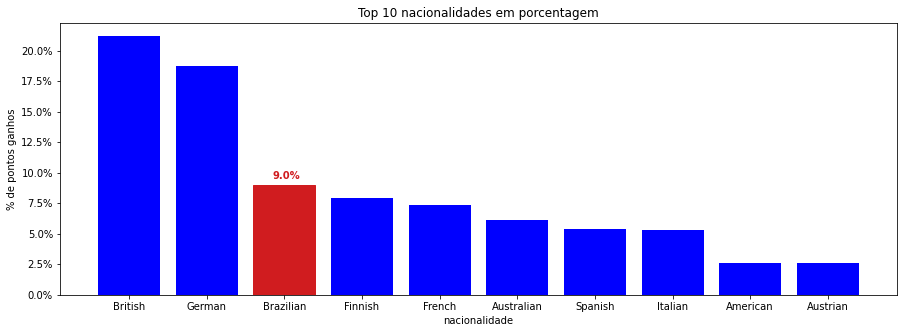

In [60]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize = (15, 5))
ax.bar(df_nationality['nationality'],  df_nationality['points_pct'], color = '#0000FF')
ax.set(xlabel = 'nacionalidade'
       , ylabel = '% de pontos ganhos'
       , title = 'Top 10 nacionalidades em porcentagem')
ax.get_children()[2].set_color('#D01C1FFF') 
plt.text(x = 2 - 0.15
         , y = df_nationality['points_pct'].iloc[2] + 0.5
         , s = '{}%'.format(round(df_nationality['points_pct'].iloc[2], 1))
         , size = 10
         , color = '#D01C1FFF'
         , weight = 'bold')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

O quanto a posição inicial do grid de larga influencia no resultado final da corrida?

In [61]:
# data stuff
df_pos = df[['grid', 'position']].copy()
df_pos = df_pos.dropna()
df_pos.head()

,grid,position
0,1,1.0
1,5,2.0
2,7,3.0
3,11,4.0
4,3,5.0


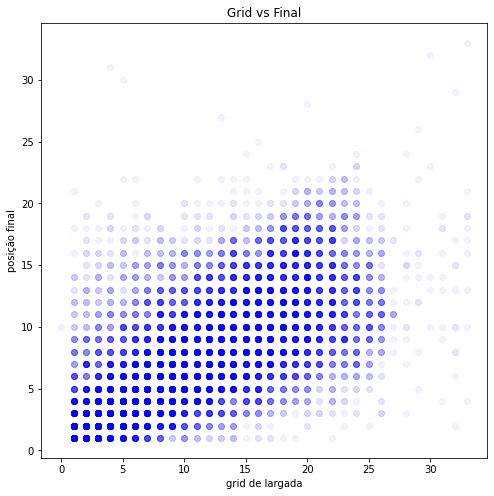

In [65]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(df_pos['grid'], df_pos['position'], alpha = 0.05, color = '#0000FF')
ax.set(xlabel = 'grid de largada'
       , ylabel = 'posição final'
       , title = 'Grid vs Final')
plt.show()

Conforme mostrado pelas cores visualizadas no gráfico, podemos supor que existe uma correlação entre a posição inicial do grid de largada com o resultado final do piloto na corrida.

Para tentar provar se existe ou não essa correlação, vamos utilizar técnicas de detecção de outliers para polir os nossos danos bem como testes de hipótese que afirmem ou conteste a nossa suposição.

E para finalizar, quem são os maiores vencedores na fórmula 1 de todos os tempos? Vamos à consulta.

In [173]:
topPilotos =df.loc[(df['position'] == 1)].groupby('driverRef')['raceId'].count().sort_values(ascending = False)[:20]
topPilotos = topPilotos.sort_values()
topPilotos

driverRef
jack_brabham          14
emerson_fittipaldi    14
button                15
moss                  16
hakkinen              20
raikkonen             20
damon_hill            22
piquet                23
rosberg               23
fangio                24
lauda                 25
clark                 25
stewart               27
mansell               31
alonso                32
senna                 41
vettel                47
prost                 51
hamilton              62
michael_schumacher    91
Name: raceId, dtype: int64

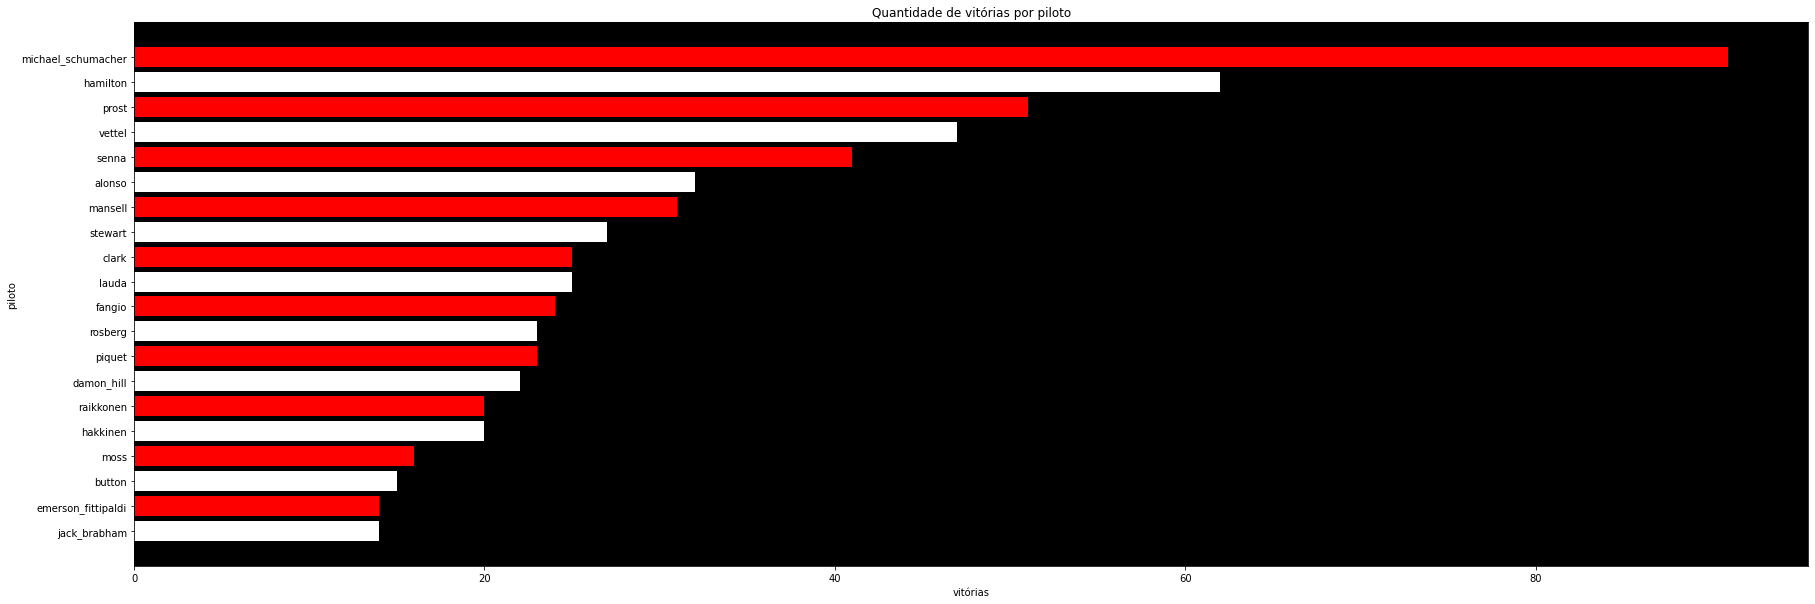

In [179]:
fig, ax = plt.subplots(figsize = (30, 10))

ax.barh(list(topPilotos.index), list(topPilotos.values), color =['white','r'])
ax.set_facecolor('k')
ax.set(xlabel = 'vitórias'
       , ylabel = 'piloto'
       , title = 'Quantidade de vitórias por piloto')

plt.show()

Como podemos ver, esses são os maiores vencedores da fórmula 1 até 2017.

Hope you enjoy! :)